In [1]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 25.57 KiB | 902.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.
Download complete
Extracting data files...
Data extracted


OK, let's see if this saves back the way I expect.

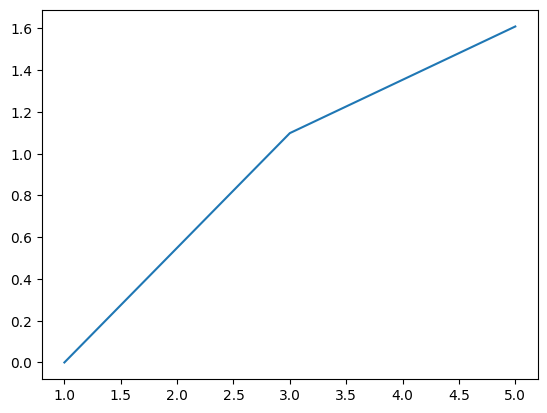

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,3,5])
y = np.log(x)

plt.plot(x,y)
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('./data/ForeignGifts_edu.csv',
                 encoding='latin1')

df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


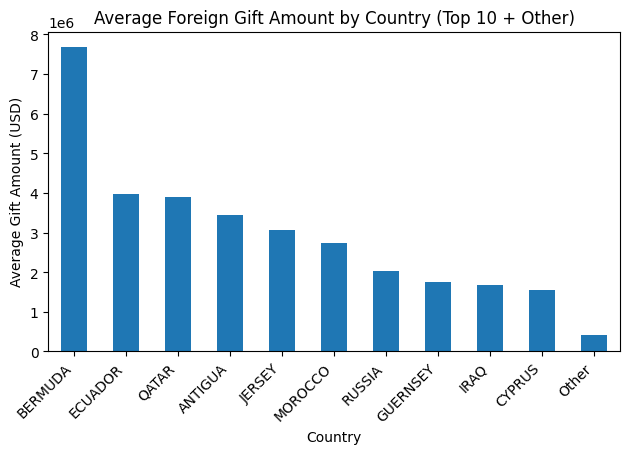

In [11]:
N = 10

avg_by_country = (
    df.groupby("Country of Giftor")["Foreign Gift Amount"]
      .mean()
      .sort_values(ascending=False)
)

top = avg_by_country.head(N)
other = avg_by_country.iloc[N:].mean()

plot_data = top.copy()
plot_data["Other"] = other

plt.figure()
plot_data.plot(kind="bar")

plt.xlabel("Country")
plt.ylabel("Average Gift Amount (USD)")
plt.title(f"Average Foreign Gift Amount by Country (Top {N} + Other)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


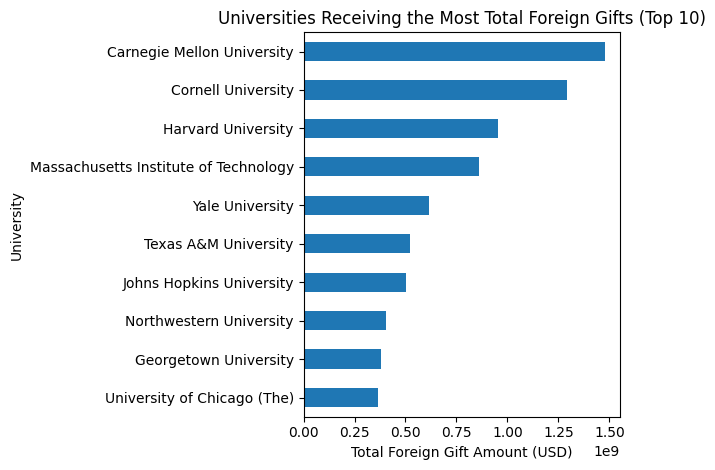

In [ ]:
total_by_univ = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
)

top = total_by_univ.head(N)

plot_data = top.copy()

plt.figure()
plot_data.sort_values().plot(kind="barh")

plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("University")
plt.title(f"Universities Receiving the Most Total Foreign Gifts (Top {N})")
plt.tight_layout()
plt.show()
